In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
#import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import neural_networks

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [4]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -1.9653533414805406
Energy: -3.1052598997056937 BondDim: 1
Energy: -3.1593585836185345 BondDim: 1
Energy: -3.16211176388207 BondDim: 1
Energy: -3.1622706661708038 BondDim: 1
Energy: -3.493959207434934 BondDim: 2
Energy: -3.4939592074349344 BondDim: 2
Energy: -3.493959207434935 BondDim: 2


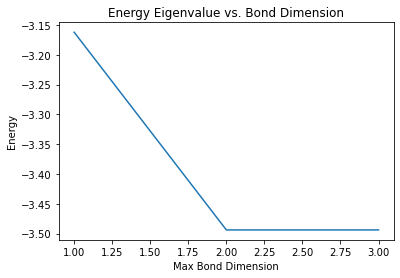

In [5]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [3]:
data = init.initialize_random_normed_vector(length=2048)

In [4]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

In [5]:
compressions, dist, sim = compress(raw_state, threshold=1e-8, plot=0)

Sim: 0.8652329529570396 Dist: 0.519166730526835 BondDim: 1
Sim: 0.8697509464726673 Dist: 0.5103901518002363 BondDim: 2
Sim: 0.8764201217576049 Dist: 0.49715164334918494 BondDim: 3
Sim: 0.8846872312564706 Dist: 0.48023487741631565 BondDim: 4
Sim: 0.891032792877394 Dist: 0.46683446128709855 BondDim: 5
Sim: 0.8991702586229261 Dist: 0.44906512083900746 BondDim: 6
Sim: 0.9059845442650064 Dist: 0.43362531230313517 BondDim: 7
Sim: 0.913764432568519 Dist: 0.41529644215062295 BondDim: 8
Sim: 0.9201731841455326 Dist: 0.39956680506385783 BondDim: 9
Sim: 0.9264574260800045 Dist: 0.38351681558961076 BondDim: 10
Sim: 0.9331367523498846 Dist: 0.36568633458229466 BondDim: 11
Sim: 0.939544001466434 Dist: 0.34772402428813437 BondDim: 12
Sim: 0.9455202837615218 Dist: 0.33009003692471617 BondDim: 13
Sim: 0.9516961165963347 Dist: 0.3108178997537502 BondDim: 14
Sim: 0.957351227179984 Dist: 0.2920574355157477 BondDim: 15
Sim: 0.962538155505248 Dist: 0.27372191908852955 BondDim: 16
Sim: 0.9667042156315439 Dis

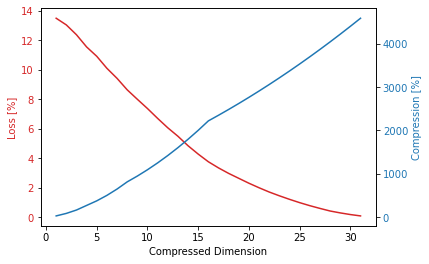

In [6]:
compressions, dist, sim = compress(raw_state, threshold=1e-8, plot=1)